# COSC 437 Data Mining Lab Assignment 5 - Decision Tree for Credit Card Default Prediction
## Data Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

| Variable Name              | Description                                                  |
| -------------------------- | ------------------------------------------------------------ |
| ID                         | ID of  each client                                           |
| LIMIT_BAL                  | Amount of given credit in NT  dollars (includes individual and family/supplementary credit |
| SEX                        | Gender (1=male, 2=female)                                    |
| EDUCATION                  | (1=graduate school, 2=university,  3=high school, 4=others, 5=unknown, 6=unknown) |
| MARRIAGE                   | Marital status (1=married,  2=single, 3=others)              |
| AGE                        | Age in years                                                 |
| PAY_0                      | Repayment status in September,  2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two  months, … 8=payment delay for eight months, 9=payment delay for nine months  and above) |
| PAY_2                      | Repayment status in August, 2005  (scale same as above)      |
| PAY_3                      | Repayment status in July, 2005  (scale same as above)        |
| PAY_4                      | Repayment status in June, 2005  (scale same as above)        |
| PAY_5                      | Repayment status in May, 2005  (scale same as above)         |
| PAY_6                      | Repayment status in April, 2005  (scale same as above)       |
| BILL_AMT1                  | Amount of bill statement in  September, 2005 (NT dollar)     |
| BILL_AMT2                  | Amount of bill statement in  August, 2005 (NT dollar)        |
| BILL_AMT3                  | Amount of bill statement in July,  2005 (NT dollar)          |
| BILL_AMT4                  | Amount of bill statement in June,  2005 (NT dollar)          |
| BILL_AMT5                  | Amount of bill statement in May,  2005 (NT dollar)           |
| BILL_AMT6                  | Amount of bill statement in April,  2005 (NT dollar)         |
| PAY_AMT1                   | Amount of previous payment in  September, 2005 (NT dollar)   |
| PAY_AMT2                   | Amount of previous payment in  August, 2005 (NT dollar)      |
| PAY_AMT3                   | Amount of previous payment in  July, 2005 (NT dollar)        |
| PAY_AMT4                   | Amount of previous payment in  June, 2005 (NT dollar)        |
| PAY_AMT5                   | Amount of previous payment in May,  2005 (NT dollar)         |
| PAY_AMT6                   | Amount of previous payment in  April, 2005 (NT dollar)       |
| default.payment.next.month | Default payment (1=yes, 0=no)                                |

## Part I - Data Loading and Exploration
Load the dataset into your environment. Perform an initial exploration of the dataset, including:
- Basic statistics and the distributions of the features.
- Distribution of the target class (ensure you note the imbalance between classes).
- Check for missing values (there are none, but confirm).

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("Credit_Card.csv")
# basic info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [43]:
# check for missing values
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


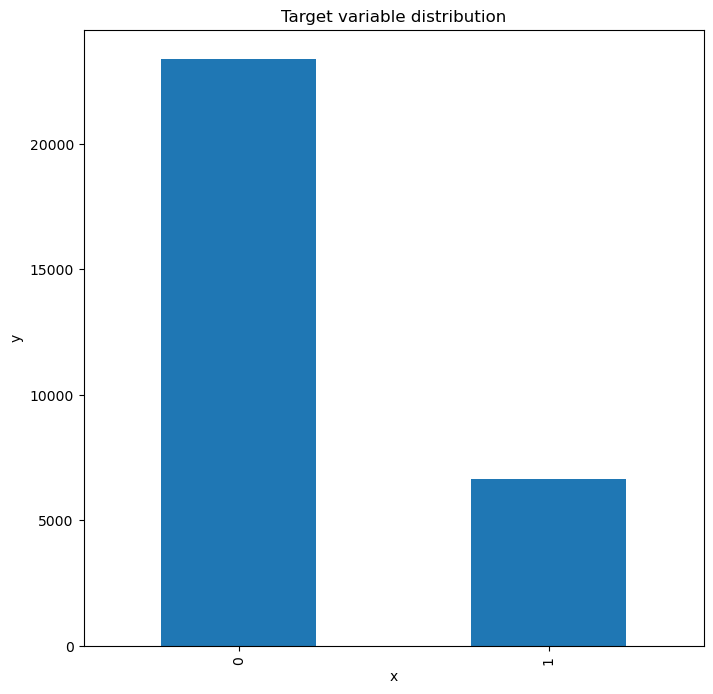

In [44]:
target = 'default.payment.next.month'
# distribution of the target
plt.figure(figsize=(8,8))
data[target].value_counts().plot(kind='bar')
plt.title("Target variable distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Part III - A Simple Logistic Regression Model
Split your data into 80% training and 20% testing. Make sure you set `stratify=y` and use a constant as seed. Then, train a simple logistic regression model. 

When building and training the model, there are a few things you should consider:
1. Are the features in a relatively small scale? Is normalization or standardization necessary for some or all the features?
2. Is there a minority class in the label? Should I consider oversampling or change weights in training?

Once the model is trained, report the model's performance on the test set. You should include all the metrics you think is necessary. Draw an ROC curve and calculate AUC.

In [45]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['ID', target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
# scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# model training (logistic regression)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', random_state=42) 
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [48]:
# model performance
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3255 1418]
 [ 504  823]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000


In [49]:
# ROC / AUC scores
from sklearn.metrics import roc_curve, auc

y_prob = log_model.predict_proba(X_test)[:, -1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

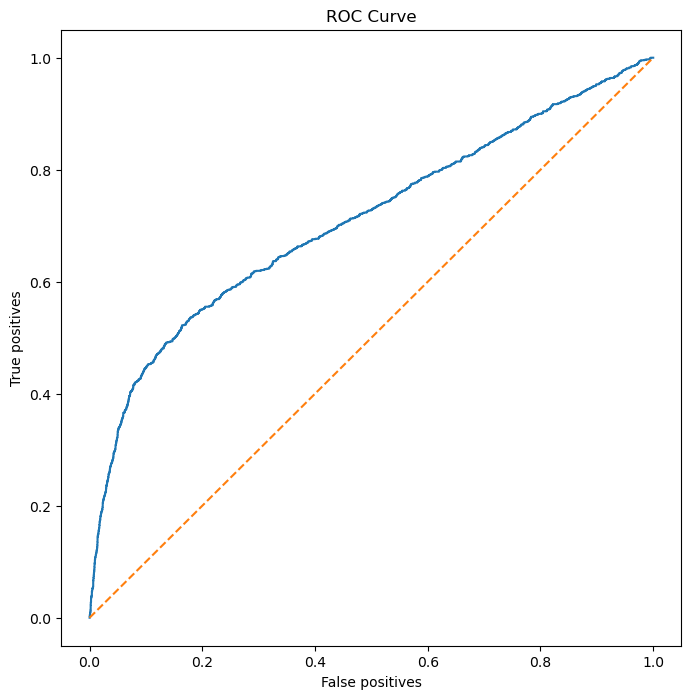

In [50]:
# plot the curves
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False positives")
plt.ylabel("True positives")
plt.title("ROC Curve")
plt.show()

## Part IV - Categorical Features
Notice that all the features are numerical, but this is not always ideal. 
- For the feature **MARRIAGE**, explain why it is undesirable to represent it as numerical.
- For the feature **EDUCATION**, sometimes it makes sense to represent it as numerical (ordinal), but not in this dataset. Explain why this dataset's EDUCATION feature should not be treated as numerical.

Convert both features into categorical with one-hot encoding. Optionally, you can further combine the **MARRIAGE** feature and the **SEX** feature into a "**MARRIAGE_SEX**" cross feature. It should have 6 different categories, representing single male, married male, single female, married female, single other, and married other.

Make sure this the new data is also scaled and balanced. Train a new logistic regression model, and report the model's performance on the test set. Draw an ROC curve and calculate AUC. Is there any improvement over the older model?



In [51]:
# Marriage should not be numerical because the representation of marriage 
# (single, married, divorced) are categorical and dont have a numerical value

# Education doesnt make sense to be numerical for essentially the same reason. 
# There are categories but there are no real numerical ranking or meaning

In [52]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

categories = ["MARRIAGE", "EDUCATION"]

encoder = OneHotEncoder(drop='first', sparse_output=False)
features = encoder.fit_transform(data[categories])

# convert this into a new data fram
e_data = pd.DataFrame(features, columns=encoder.get_feature_names_out())
# drop and merge
encoded_data = data.drop(columns=categories).join(e_data)


In [53]:
# make the MARRIAGE_SEX cross feature
encoded_data['MARRIAGE_SEX'] = data['MARRIAGE'].astype(str) + "_" + data['SEX'].astype(str)

encoded_marriage_sex = pd.get_dummies(encoded_data['MARRIAGE_SEX'], prefix="MARRIAGE_SEX")
encoded_data = encoded_data.drop(columns=['MARRIAGE_SEX']).join(encoded_marriage_sex)

In [54]:
# scale and balance the data
X = encoded_data.drop(columns=['ID', target])
y = encoded_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# new log_model
new_log_model = LogisticRegression(class_weight='balanced', random_state=42)
new_log_model.fit(X_train, y_train)

# predict on the new set
y_pred_new = new_log_model.predict(X_test)
y_prob_new = new_log_model.predict_proba(X_test)[:, 1]

In [57]:
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[3253 1420]
 [ 498  829]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000


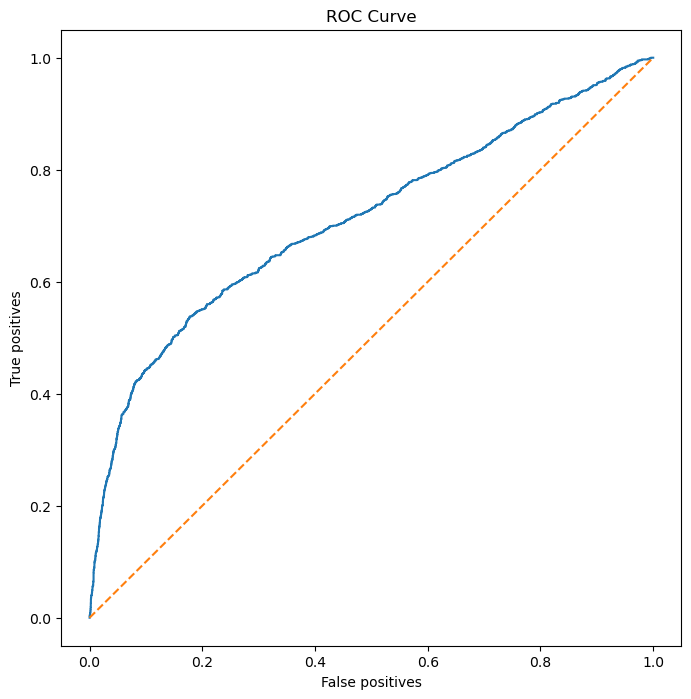

In [58]:
# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False positives')
plt.ylabel('True positives')
plt.title('ROC Curve')
plt.show()

## Part VI - Decision Tree Classifier
Build a set of decision tree classifiers. Set `max_depth` to be 1, 2, 4, 8, 16, and 32. (Decision trees do not require scaled input. Rather, using the original scale makes interpretation more intuitive.) 
- Compare their performance on the training set. Is the error always decreasing as the tree becomes deeper?
- Compare their performance on the test set. Is the error always decreasing as the tree becomes deeper?

In [59]:
## TODO: Your code here. If appropriate, use multiple code blocks.

Pick the tree that's giving the best out-of-sample performance. Visualize the decision tree. Have a brief interpretation of how the model will determine whether or not a client is likely to default credit card payment. Which features are the most indicative of payment default? 

In [60]:
## TODO: Your code here. If appropriate, use multiple code blocks.

## Submit Your Assignment
To print your assignment, first select Cell -> Run All. Then choose File -> Download as -> HTML. You should submit both the Jupyter Notebook file and theprinted HTML file.

## Acknowledgement
- Yeh, I. (2009). Default of Credit Card Clients \[Dataset\]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.
- https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients